Wine PCA



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
X=df.iloc[:,1:]
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
pca=PCA()
n_data=pca.fit_transform(X)

In [ ]:
data=pd.DataFrame(n_data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,318.562979,21.492131,3.130735,-0.250114,0.677078,0.568081,-0.619642,-0.199555,0.701280,-0.095008,0.088734,-0.038548,0.080264
1,303.097420,-5.364718,6.822835,-0.864035,-0.486096,0.014340,0.108865,0.604714,0.286717,-0.045782,0.039778,-0.057192,0.013593
2,438.061133,-6.537309,-1.113223,0.912411,0.380651,0.672404,0.785819,-0.500886,0.024547,-0.208960,0.237770,-0.048798,-0.035408
3,733.240139,0.192729,-0.917257,-0.541251,0.858662,0.599122,0.018770,0.190428,0.054277,0.531684,-0.096044,-0.166353,0.016344
4,-11.571428,18.489995,-0.554422,1.360896,0.276442,0.768884,-0.309976,0.119091,-0.195843,0.061771,0.316466,-0.007118,0.015278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,-3.155920,-2.348927,1.439001,-0.026425,0.043705,0.040167,0.087377,0.016509,0.098355,0.027251
174,3.131605,2.335191,-4.309931,-1.562181,-1.168003,0.128679,0.003859,-0.303185,-0.159759,0.159510,-0.048916,0.012626,-0.042645
175,88.458074,18.776285,-2.237577,-4.820708,-1.057336,0.215000,0.648489,0.068966,0.273675,-0.045336,-0.223049,0.096049,0.036175
176,93.456242,18.670819,-1.788392,-3.709352,-0.276956,-1.009229,0.414948,-0.145647,0.254468,0.059211,-0.030408,-0.052089,0.132759


In [ ]:
np.round(pca.explained_variance_,4)

array([9.92017895e+04, 1.72535300e+02, 9.43810000e+00, 4.99120000e+00,
       1.22880000e+00, 8.41100000e-01, 2.79000000e-01, 1.51400000e-01,
       1.12100000e-01, 7.17000000e-02, 3.76000000e-02, 2.11000000e-02,
       8.20000000e-03])

In [ ]:
explained_variance_ratio=pca.explained_variance_ratio_

# Feature Importance

<BarContainer object of 13 artists>

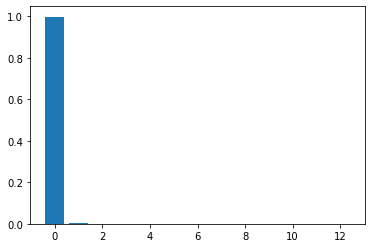

In [ ]:
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)

# from the above analysis first three features are of maximum importance, so we'll keep first two features.

In [ ]:
new_data=data.iloc[:,:3]
new_data=new_data.rename(columns={0:'pca1',1:'pca2',2:'pca3'})

In [ ]:
new_data

,pca1,pca2,pca3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


In [ ]:
scalar=MinMaxScaler()
scaled_data=scalar.fit_transform(new_data)

In [ ]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data

,0,1,2
0,0.561714,0.567757,0.640338
1,0.550684,0.256546,0.835149
2,0.646937,0.242958,0.416408
3,0.857452,0.320944,0.426748
4,0.326270,0.532969,0.445893
...,...,...,...
173,0.329544,0.266089,0.344570
174,0.336755,0.345770,0.247736
175,0.397608,0.536286,0.357082
176,0.401173,0.535064,0.380783


# Hierarchical Clustering

# Dendogram

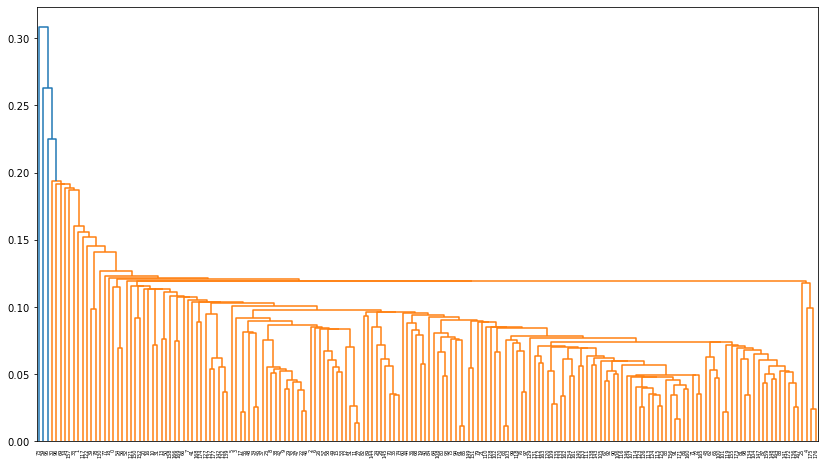

In [ ]:
plt.figure(figsize=(14,8))
dendogram=sch.dendrogram(sch.linkage(scaled_data,method='single'))

### Finding the optimum no. of clusters using silhouette score

In [ ]:
from sklearn.metrics import silhouette_score as sil

In [ ]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')
    y=hc.fit_predict(scaled_data)
    sc_score.append(sil(scaled_data,y))
print(sc_score)

[0.18530499981269305, 0.2621648878434623, 0.26856712934330057, 0.2668444216877552, 0.25544158273207335, 0.24325814341402366, 0.22356006110432855, 0.21641789366880734]


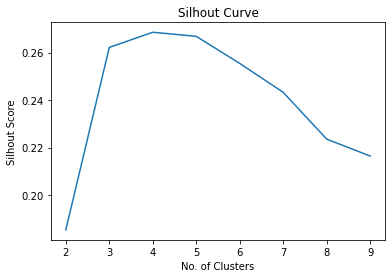

In [ ]:
plt.plot(nc,sc_score)
plt.title('Silhout Curve')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhout Score')
plt.show()

# So  the best score is coming for second index that is optimum no. of clusters are 3.

In [ ]:
hc=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc=hc.fit_predict(scaled_data)
#scaled_data['y_hc']=y
scaled_data

,0,1,2
0,0.561714,0.567757,0.640338
1,0.550684,0.256546,0.835149
2,0.646937,0.242958,0.416408
3,0.857452,0.320944,0.426748
4,0.326270,0.532969,0.445893
...,...,...,...
173,0.329544,0.266089,0.344570
174,0.336755,0.345770,0.247736
175,0.397608,0.536286,0.357082
176,0.401173,0.535064,0.380783


## KMeans Clustering

In [ ]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
score_elbow=[]
for i in nc:
    km = KMeans(n_clusters=i)
    y=km.fit_predict(scaled_data)
    sc_score.append(sil(scaled_data,y))
    score_elbow.append(km.inertia_) 
print(sc_score)
print(score_elbow)

[0.3839055474678567, 0.2977770690754487, 0.3213109336440008, 0.2919462583572104, 0.27689537493214855, 0.27563222429009127, 0.2640594914784332, 0.2765537695349802]
[10.995772178958557, 8.512148535142698, 6.621545174848395, 5.720717314165406, 4.999071968886707, 4.496172880584622, 4.152709152692602, 3.70631975195408]


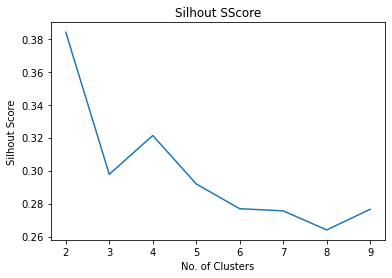

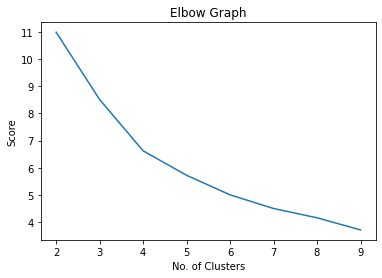

In [ ]:
plt.plot(nc,sc_score)
plt.title("Silhout SScore")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhout Score")
plt.show()

plt.plot(nc,score_elbow)
plt.title("Elbow Graph")
plt.xlabel("No. of Clusters")
plt.ylabel("Score")
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_km=km.fit_predict(scaled_data)

## DBSCAN

In [ ]:
dbscan=DBSCAN(eps=0.1,min_samples=2)
dbscan.fit(scaled_data)
y_db=dbscan.labels_
y_db

array([-1, -1,  0,  0,  1, -1,  0, -1,  0,  0,  2,  0,  0,  3, -1,  0, -1,
        0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  2,  0, -1,
        0,  0,  0,  0,  0,  4,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0, -1,  0,  5,  0,  5,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  4,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  6,  0,  0, -1,  0,  6,  0,  0,  0,
        0,  6,  0,  6,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  7,  0,  7,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  8,  0,  9,  8,
        0,  0,  0,  0,  9,  1,  1,  6], dtype=int64)

In [ ]:
scaled_data['y_hc']=y_hc
scaled_data['y_km']=y_km
scaled_data['y_db']=y_db
scaled_data

,0,1,2,y_hc,y_km,y_db
0,0.561714,0.567757,0.640338,0,1,-1
1,0.550684,0.256546,0.835149,2,1,-1
2,0.646937,0.242958,0.416408,2,1,0
3,0.857452,0.320944,0.426748,2,1,0
4,0.326270,0.532969,0.445893,1,2,1
...,...,...,...,...,...,...
173,0.329544,0.266089,0.344570,1,2,0
174,0.336755,0.345770,0.247736,1,2,9
175,0.397608,0.536286,0.357082,1,2,1
176,0.401173,0.535064,0.380783,1,2,1


In [ ]:
print(scaled_data['y_hc'].value_counts())
print(scaled_data['y_km'].value_counts())
print(scaled_data['y_db'].value_counts())

0    71
1    67
2    40
Name: y_hc, dtype: int64
0    68
2    59
1    51
Name: y_km, dtype: int64
 0    129
-1     26
 6      6
 1      3
 2      2
 3      2
 4      2
 5      2
 7      2
 8      2
 9      2
Name: y_db, dtype: int64


# So for Hierarchical we are getting 3 clusters,for KMeans we are getting 3 clusters and for DBSCAN we are getting 11 clusters.